# Task # 1 Titanic Survival Prediction

# import libs and data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
titanic=pd.read_csv('C:\\Users\\Administrator\\Desktop\\titanic.csv')
titanic

In [8]:
# check NaN Values
titanic.isna().sum(), titanic.isna()


(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
 0          False     False   False  False  False  False  False  False   False   
 1          False     False   False  False  False  False  False  False   False   
 2          False     False   False  False  False  False  False  False   False   
 3          False     False   False  False  False  False  False  False   False   
 4          False     False   False  False  False  False  False  False   False   
 ..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
 413        False     False   False  False  False   True  False  False   False   
 414        False     False   False  False  False  False  False  False   False   
 415   

In [9]:
# Check index, columns and data type
titanic.index, titanic.columns,titanic.dtypes


(RangeIndex(start=0, stop=418, step=1),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

In [10]:
#now fill NaN values
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(),inplace=True)
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [11]:
titanic['Age']=titanic['Age'].fillna(0).astype(int)


In [12]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
male=titanic[titanic['Sex']=='male']

In [14]:
female=titanic[titanic['Sex']=='female']

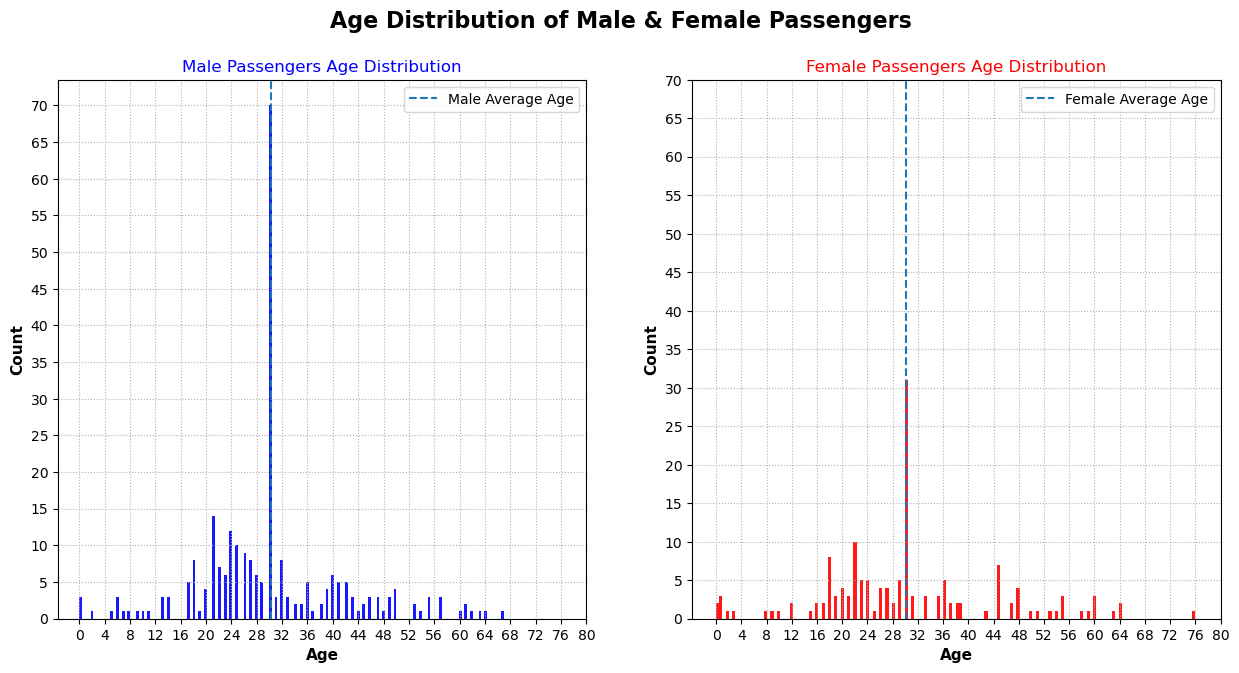

In [15]:
# Age ditribution of male passengers and female passenger ()
fig,(plot1,plot2)=plt.subplots(nrows=1,ncols=2,figsize=(15,7))
plt.suptitle('Age Distribution of Male & Female Passengers',fontsize=16,fontweight='bold')
plot1.hist(x=male['Age'], color='blue', bins=150, alpha= 0.9)  # Customize bins and alpha as needed
plot1.set_title('Male Passengers Age Distribution',color='blue')
plot1.set_xticks(range(0, 84, 4))
plot1.set_yticks(range(0, 75, 5))
plot1.set_xlabel('Age',fontsize=11,fontweight='bold')
plot1.set_ylabel('Count',fontsize=11,fontweight='bold');
plot1.axvline(x=male['Age'].mean(),linestyle='--',label="Male Average Age")
plot1.grid(True,linestyle=':')
plot1.legend()

plot2.hist(x=female['Age'], color='red', bins=150, alpha= 0.9)  # Customize bins and alpha as needed
plot2.set_title('Female Passengers Age Distribution',color='red')
plot2.set_xticks(range(0, 84, 4))
plot2.set_yticks(range(0, 75, 5))
plot2.set_xlabel('Age',fontsize=11,fontweight='bold')
plot2.set_ylabel('Count',fontsize=11,fontweight='bold');
plot2.axvline(x=male['Age'].mean(),linestyle='--',label="Female Average Age")
plot2.legend()
plot2.grid(True,linestyle=':')


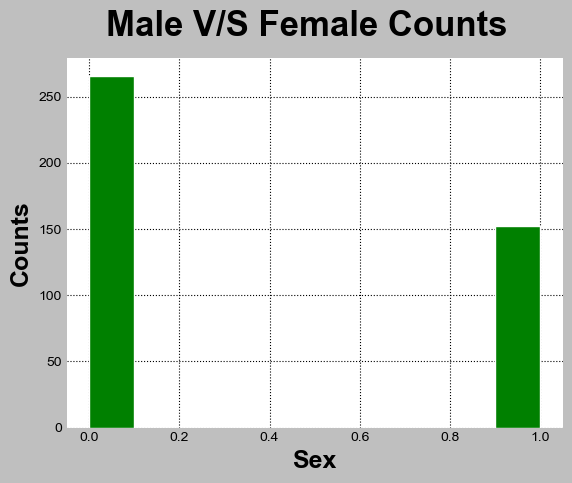

In [53]:
color='green'
edge_color='white'
plt.hist(titanic["Sex"], color=color, edgecolor=edge_color,rwidth=.99)
plt.suptitle('Male V/S Female Counts',color='black',fontsize=25,fontweight='bold')
plt.xlabel('Sex',fontsize=18,fontweight='bold')
#plt.xticks(range(0,300,50))
#plt.yticks(range(0,300,10))
plt.ylabel('Counts',fontsize=18,fontweight='bold')
#plt.axhline(y=titanic[''].mean(),linestyle='--')
plt.grid(True,linestyle=':')

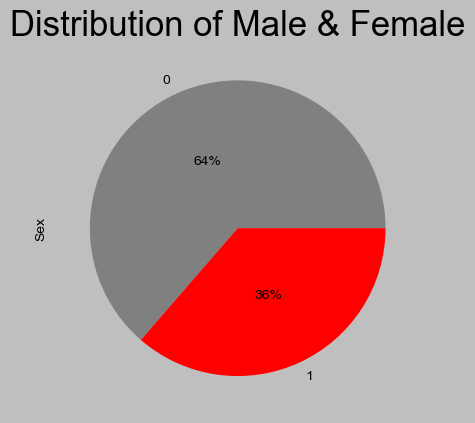

In [51]:
titanic['Sex'].value_counts().plot(kind='pie',colors=['gray','red'],autopct='%1.0f%%',pctdistance=0.50)
plt.title('Distribution of Male & Female',fontsize=25);

In [18]:
male['Survived'].value_counts(),female['Survived'].value_counts()

(0    266
 Name: Survived, dtype: int64,
 1    152
 Name: Survived, dtype: int64)

In [19]:
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [20]:
titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [21]:
titanic=titanic.drop(columns='Cabin')

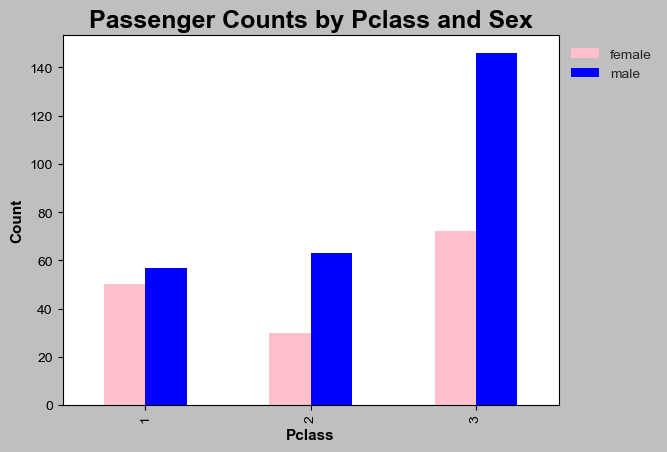

In [22]:
passenger_counts = titanic.groupby(['Pclass', 'Sex']).size().unstack()

# Create a bar plot
passenger_counts.plot(kind='bar',color=['pink','blue'])
plt.xlabel('Pclass',fontsize=11,fontweight='bold')
plt.ylabel('Count',fontsize=11,fontweight='bold')
plt.title('Passenger Counts by Pclass and Sex',fontsize=18,fontweight='bold')
plt.style.available
plt.style.use('seaborn-v0_8-darkgrid')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()


In [23]:
group=titanic.groupby(['Embarked', 'Sex']).size().unstack()
group

Sex,female,male
Embarked,,
C,40,62
Q,24,22
S,88,182


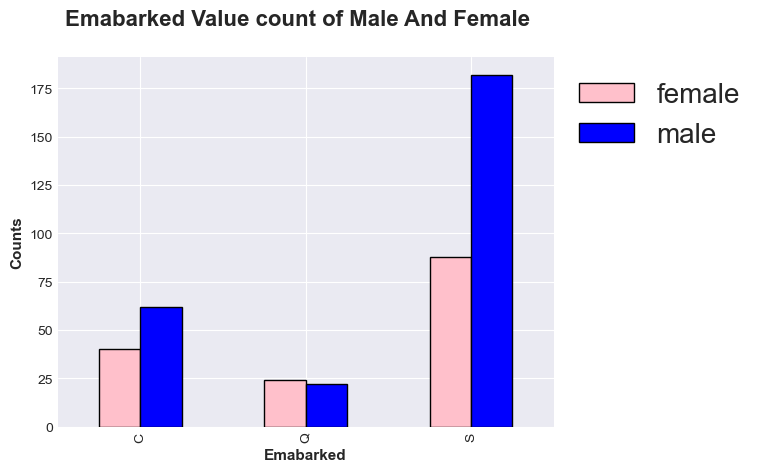

In [24]:
group.plot(kind='bar',color=['pink','blue'],edgecolor='black'),
plt.suptitle('Emabarked Value count of Male And Female',fontsize=16,fontweight='bold');
plt.xlabel('Emabarked',fontsize=11,fontweight='bold')
plt.ylabel('Counts',fontsize=11,fontweight='bold')
plt.style.use('seaborn-v0_8-darkgrid')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),fontsize=20)

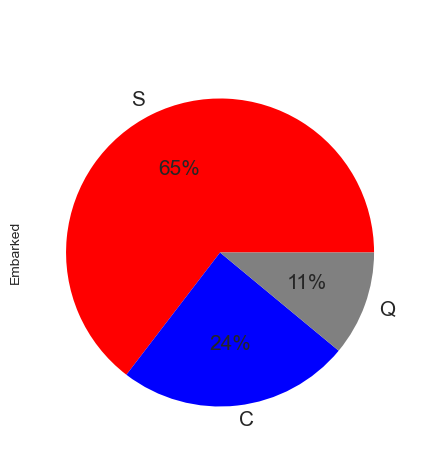

In [25]:
titanic['Embarked'].value_counts().plot(kind="pie",colors=['red','blue','gray'],autopct='%1.0f%%',fontsize=15,figsize=(10,5))
plt.suptitle('Distribution of Embarked',color='white',fontsize=20,fontweight='bold');
plt.style.use('dark_background')

In [26]:
survive=titanic.groupby('Sex')['Survived'].sum()
survive

Sex
female    152
male        0
Name: Survived, dtype: int64

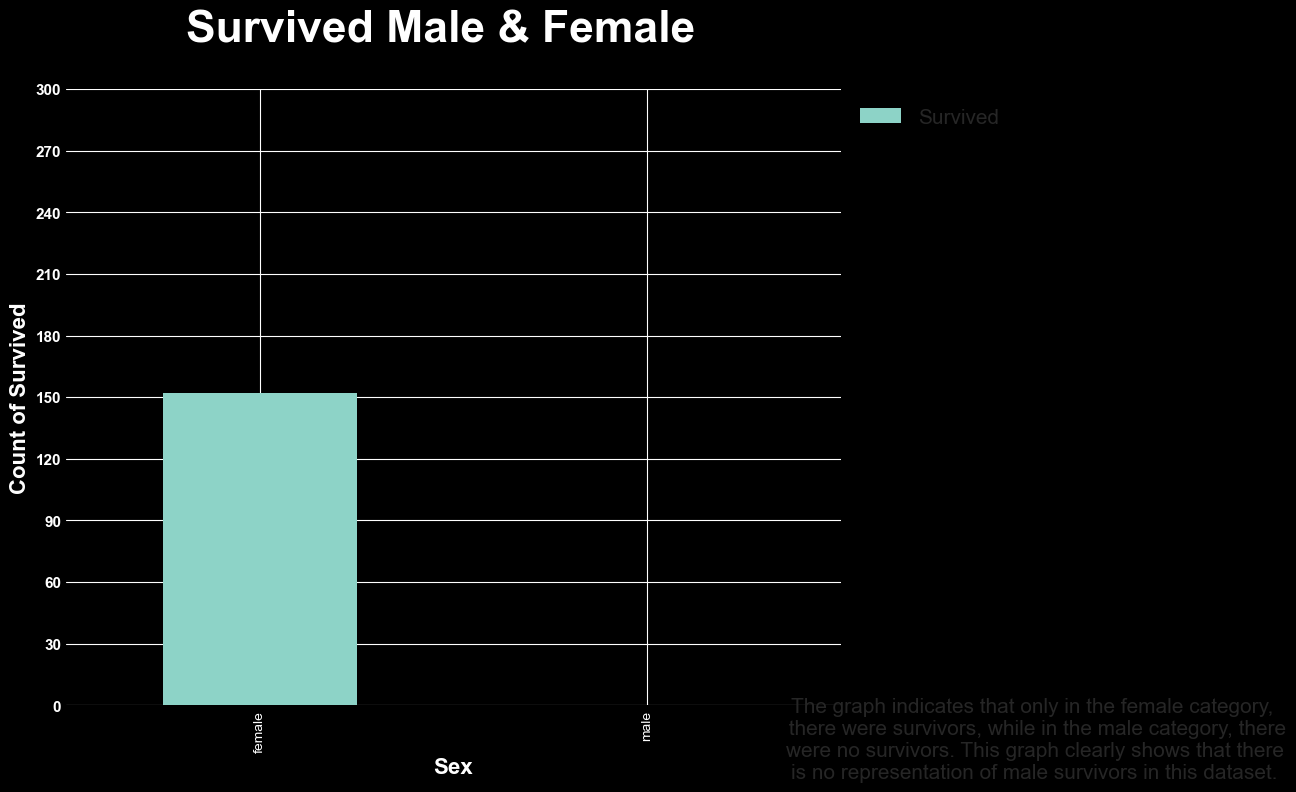

In [27]:
survive.plot( kind='bar',figsize=(10,8))
plt.suptitle('Survived Male & Female',fontsize=32,fontweight='bold');
plt.xlabel("Sex",fontsize=16,fontweight='bold')
plt.ylabel('Count of Survived',fontsize=16,fontweight='bold')
plt.style.use('seaborn-v0_8-darkgrid')
plt.yticks(range(0,330,30),fontsize=11,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),fontsize=15);
plt.text(2, 4, 'The graph indicates that only in the female category, \n there were survivors, while in the male category, there\nwere no survivors. This graph clearly shows that there\nis no representation of male survivors in this dataset.', fontsize=15, ha='center' ,va='top');


In [28]:
sur_by_class=titanic.groupby('Pclass')['Survived'].sum()

sur_by_class

Pclass
1    50
2    30
3    72
Name: Survived, dtype: int64

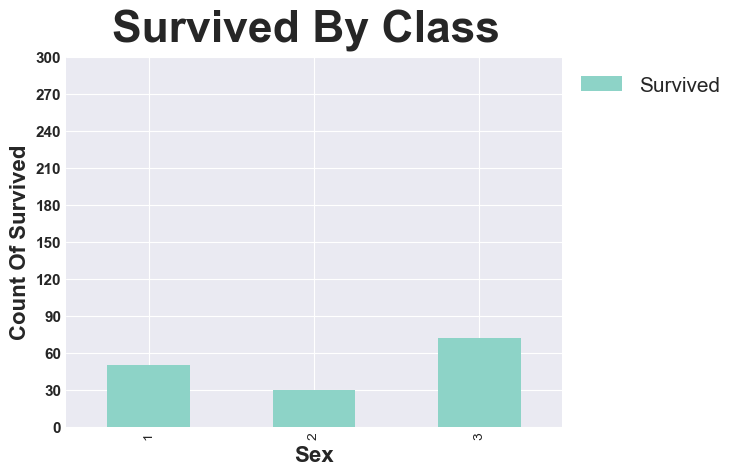

In [29]:
sur_by_class.plot( kind='bar' )
plt.suptitle('Survived By Class',fontsize=32,fontweight='bold');
plt.xlabel("Sex",fontsize=16,fontweight='bold')
plt.ylabel('Count Of Survived',fontsize=16,fontweight='bold')
plt.style.use('fast')
plt.style.use('seaborn-v0_8-darkgrid')
plt.yticks(range(0,330,30),fontsize=11,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),fontsize=15);

In [30]:
sur_by_embark=titanic.groupby('Embarked')['Survived'].sum()
sur_by_embark

Embarked
C    40
Q    24
S    88
Name: Survived, dtype: int64

In [31]:
40+24+88

152

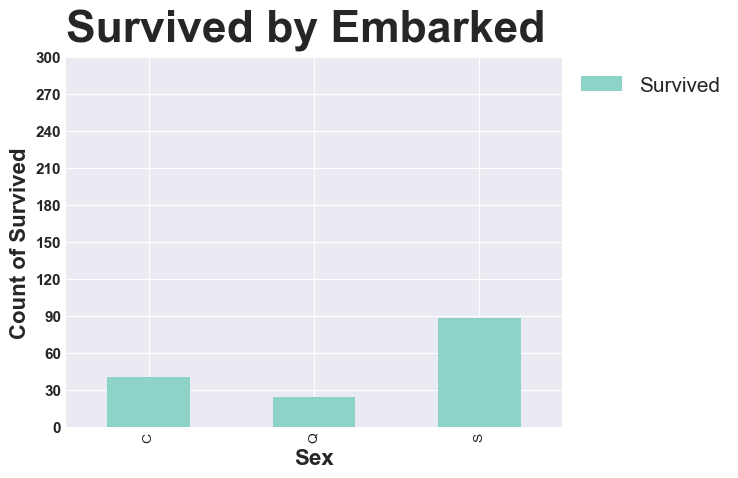

In [32]:
sur_by_embark.plot( kind='bar' )
plt.suptitle('Survived by Embarked',fontsize=32,fontweight='bold');
plt.xlabel("Sex",fontsize=16,fontweight='bold')
plt.ylabel('Count of Survived',fontsize=16,fontweight='bold')
plt.style.use('fast')
plt.style.use('seaborn-v0_8-darkgrid')
plt.yticks(range(0,330,30),fontsize=11,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),fontsize=15);

In [33]:
not_survived_class_1 = titanic.query('Pclass == 1 and Survived == 0')
##not_survived_class_2 = titanic.query('Pclass == 2 and Survived == 0')
#not_survived_class_3 = titanic.query('Pclass == 3 and Survived == 0')
#not_survived_class_1
#not_survived_class_2
#not_survived_class_3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


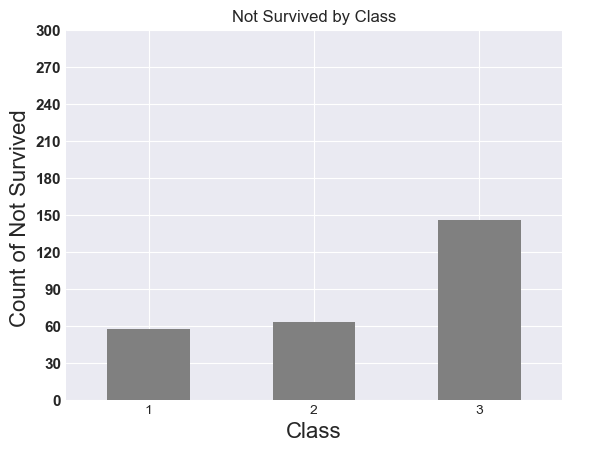

In [34]:
not_survived_by_class = titanic.query('Survived == 0').groupby('Pclass').size()

# Plotting the bar graph
not_survived_by_class.plot(kind='bar',color='gray', rot=0)
plt.xlabel('Class',fontsize=16)
plt.ylabel('Count of Not Survived ',fontsize=16)
plt.style.use('seaborn-v0_8-darkgrid')
plt.title('Not Survived by Class')
plt.yticks(range(0,330,30),fontsize=11,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),fontsize=15)
plt.show()


In [35]:
not_survived_by_class

Pclass
1     57
2     63
3    146
dtype: int64

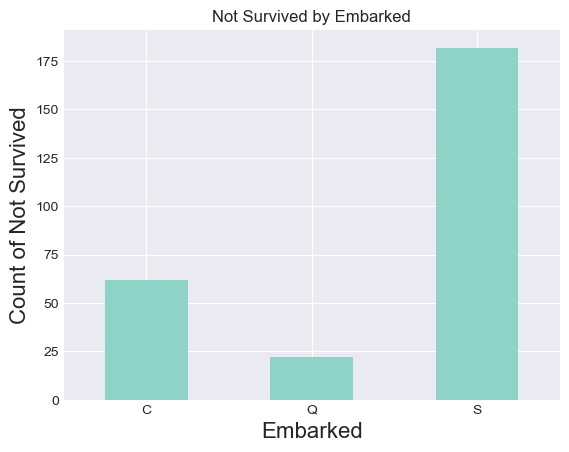

In [36]:
not_survived_by_class = titanic.query('Survived == 0').groupby('Embarked').size()

# Plotting the bar graph
not_survived_by_class.plot(kind='bar', rot=0)
plt.xlabel('Embarked',fontsize=16)
plt.ylabel('Count of Not Survived',fontsize=16 )
plt.style.use('seaborn-v0_8-darkgrid')
plt.title('Not Survived by Embarked')
plt.show()

In [37]:
titanic['Embarked'].replace({'Q':0,'S':1,'C':2},inplace=True)

In [38]:
titanic['Sex'].replace({'male':0,'female':1},inplace=True)

In [39]:
titanic.drop('Name', axis=1, inplace=True)


In [40]:
x=titanic.drop(['Survived','Ticket'],axis=1)
y=titanic['Survived']


# Apply ML model RandomForestClassifier() 

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn .model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rc= RandomForestClassifier()

rc.fit(X_train,y_train)
y_predict=rc.predict(X_test)
a=rc.score(X_test,y_test)
print(f'Test Accuracy :{a}' )
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)
mean_error= mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error:", mean_error)

Test Accuracy :1.0
Accuracy: 1.0
Mean Absolute Error: 0.0
